<a href="https://colab.research.google.com/github/AalaaAyman24/Teeth_Classification_Final/blob/main/Teeth_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from PIL import Image

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
image_folder_path = '/content/drive/MyDrive/Cellula_intern/Teeth_Dataset'
Types = list(os.listdir(image_folder_path))
Illness=list(os.listdir(os.path.join(image_folder_path,Types[2])))
print(Types)

train_data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Cellula_intern/Teeth_Dataset/Training')
test_data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Cellula_intern/Teeth_Dataset/Testing')
validation_data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Cellula_intern/Teeth_Dataset/Validation')

print(Illness)


['Validation', 'Testing', 'Training']
Found 3087 files belonging to 7 classes.
Found 1508 files belonging to 10 classes.
Found 1028 files belonging to 7 classes.
['CaS', 'CoS', 'MC', 'OLP', 'Gum', 'OC', 'OT']


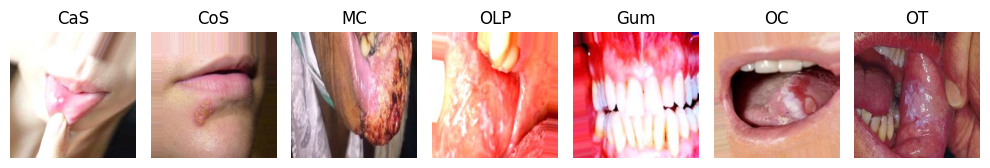

<Figure size 640x480 with 0 Axes>

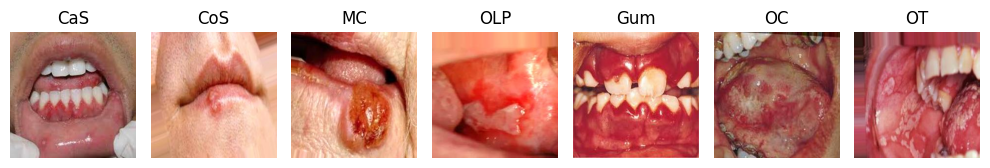

<Figure size 640x480 with 0 Axes>

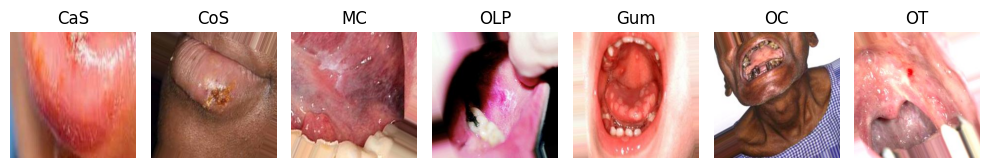

Text(0.5, 1.0, 'Random Images [Test Dataset]:')

<Figure size 640x480 with 0 Axes>

In [8]:
def plot_one_image_per_illness(category, illness_list):

    fig, axes = plt.subplots(1, len(illness_list), figsize=(10, 10))
    if len(illness_list) == 1:
        axes = [axes]

    for ax, illness in zip(axes, illness_list):
        illness_dir = os.path.join(image_folder_path, category, illness)
        valid_extensions = ('.jpeg', '.jpg', '.bmp', '.png')
        illness_images = list(filter(lambda x: x.endswith(valid_extensions), os.listdir(illness_dir)))

        if illness_images:
            img_path = os.path.join(illness_dir, random.choice(illness_images))
            img = plt.imread(img_path)
            ax.imshow(img)
            ax.set_title(illness)
            ax.axis('off')
        else:
            ax.set_title(f'No images for {illness}')
            ax.axis('off')

    plt.tight_layout()
    plt.show()


plot_one_image_per_illness(Types[2], Illness)
plt.suptitle('Random Images [Validation Dataset]:', y=1.00)

plot_one_image_per_illness(Types[1], Illness)
plt.suptitle('Random Images [Training Dataset]:', y=1.00)

plot_one_image_per_illness(Types[0], Illness)
plt.suptitle('Random Images [Test Dataset]:', y=1.00)

In [9]:
def Load_and_preprocessing(train_data, validation_data, target_size, batch_size):
    train_datagen = ImageDataGenerator(
        rescale=1.0/255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    validation_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_data,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical'
    )


    validation_generator = validation_datagen.flow_from_directory(
        validation_data,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical'
    )


    return train_generator, validation_generator

In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,037,255 (72.62 MB)

 Trainable params: 19,037,255 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
train_generator, validation_generator = Load_and_preprocessing('/content/drive/MyDrive/Cellula_intern/Teeth_Dataset/Training',
                                                               '/content/drive/MyDrive/Cellula_intern/Teeth_Dataset/Validation',
                                                               target_size=(150, 150),
                                                               batch_size=32)
images, labels = next(train_generator)
print('Image batch shape:', images.shape)
print('Labels batch shape:', labels.shape)

Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Image batch shape: (32, 150, 150, 3)
Labels batch shape: (32, 7)


In [15]:
print(train_generator.class_indices)
print(validation_generator.class_indices)

{'CaS': 0, 'CoS': 1, 'Gum': 2, 'MC': 3, 'OC': 4, 'OLP': 5, 'OT': 6}
{'CaS': 0, 'CoS': 1, 'Gum': 2, 'MC': 3, 'OC': 4, 'OLP': 5, 'OT': 6}


In [16]:
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

In [ ]:
history = model.fit(
    train_generator,
    epochs = 100,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 34s 320ms/step - accuracy: 0.7333 - loss: 0.7489 - val_accuracy: 0.8726 - val_loss: 0.4405 - learning_rate: 0.0010
Epoch 2/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 42s 326ms/step - accuracy: 0.7603 - loss: 0.6942 - val_accuracy: 0.8531 - val_loss: 0.4809 - learning_rate: 0.0010
Epoch 3/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 34s 332ms/step - accuracy: 0.7839 - loss: 0.6361 - val_accuracy: 0.8551 - val_loss: 0.4441 - learning_rate: 0.0010
Epoch 4/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 35s 335ms/step - accuracy: 0.7371 - loss: 0.7369 - val_accuracy: 0.8862 - val_loss: 0.3580 - learning_rate: 0.0010
Epoch 5/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 34s 332ms/step - accuracy: 0.7871 - loss: 0.6336 - val_accuracy: 0.8940 - val_loss: 0.3473 - learning_rate: 0.0010
Epoch 6/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 34s 332ms/step - accuracy: 0.7856 - loss: 0.6374 - val_accuracy: 0.8813 - val_loss: 0.3679 - learning_rate: 0.0010
Epoch 7/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 40s 328ms/step - accuracy: 0.7801 - l

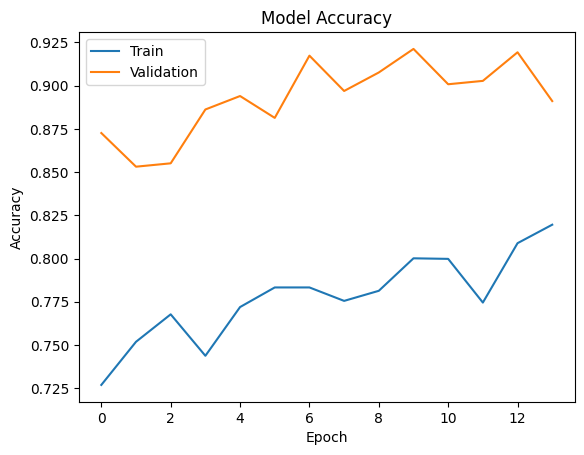

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

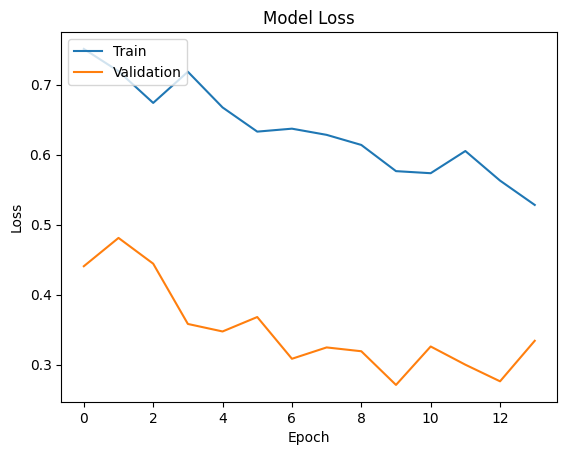

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_dir = '/content/drive/MyDrive/Teeth_Dataset/Testing'
test_datagen = ImageDataGenerator(rescale=1./255)


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False
)


test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Found 1028 images belonging to 7 classes.
33/33 ━━━━━━━━━━━━━━━━━━━━ 324s 10s/step - accuracy: 0.9247 - loss: 0.2869
Test Loss: 0.2576649487018585
Test Accuracy: 0.9250972867012024


In [ ]:
model.save('teeth_classification_model.h5')
